### Kaggle: https://www.kaggle.com/code/mohamedtahaouf/8901-bank-churn-using-catboostclassifier-cbc
# Bank Churn Binary Classification

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ML1">EDA.</a></li>
<li><a href="#ML2">ML.</a></li>
<li><a href="#ML6">Apply the selected model.</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset for this competition (both train and test) was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.
            

<a id='wrangling'></a>
## Data Wrangling


> In this section we will clarify the data to analyze it and answer the questions easily.

In [1]:
# Import the laibraies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

Thanks: <br>
@paddykb : https://www.kaggle.com/competitions/playground-series-s4e1/discussion/469859 <br>
@ARAVIND PILLAI : https://www.kaggle.com/code/aspillai/bank-churn-catboost-0-89609

In [2]:
# We have got an extened data
df_train1=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
df_test =pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
id_df_test=pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
df_orig=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df_orig=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df_orig.rename(columns={'RowNumber':'id'},inplace=True)
df_train=pd.concat([df_orig,df_train1])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175036 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               175036 non-null  int64  
 1   CustomerId       175036 non-null  int64  
 2   Surname          175036 non-null  object 
 3   CreditScore      175036 non-null  int64  
 4   Geography        175035 non-null  object 
 5   Gender           175036 non-null  object 
 6   Age              175035 non-null  float64
 7   Tenure           175036 non-null  int64  
 8   Balance          175036 non-null  float64
 9   NumOfProducts    175036 non-null  int64  
 10  HasCrCard        175035 non-null  float64
 11  IsActiveMember   175035 non-null  float64
 12  EstimatedSalary  175036 non-null  float64
 13  Exited           175036 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 20.0+ MB


In [4]:
df_train.drop(["id"],axis=1,inplace=True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175036 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       175036 non-null  int64  
 1   Surname          175036 non-null  object 
 2   CreditScore      175036 non-null  int64  
 3   Geography        175035 non-null  object 
 4   Gender           175036 non-null  object 
 5   Age              175035 non-null  float64
 6   Tenure           175036 non-null  int64  
 7   Balance          175036 non-null  float64
 8   NumOfProducts    175036 non-null  int64  
 9   HasCrCard        175035 non-null  float64
 10  IsActiveMember   175035 non-null  float64
 11  EstimatedSalary  175036 non-null  float64
 12  Exited           175036 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 18.7+ MB


In [6]:
# describe the descriptive & continuousvalues
df_train.describe(include="O")

,Surname,Geography,Gender
count,175036,175035,175036
unique,2932,3,2
top,Hsia,France,Male
freq,2474,99229,98608


In [7]:
df_train.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.750360e+05,175036.000000,175035.000000,175036.000000,175036.000000,175036.000000,175035.000000,175035.000000,175036.000000,175036.000000
mean,1.569194e+07,656.117273,38.171393,5.019904,56678.824183,1.553069,0.751187,0.498752,111861.027293,0.211151
std,7.142866e+04,81.151830,8.969523,2.811125,62982.466070,0.549210,0.432327,0.500000,50815.418008,0.408126
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563288e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73181.390000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000
75%,1.575666e+07,710.000000,42.000000,7.000000,120729.770000,2.000000,1.000000,1.000000,154767.340000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
df_train.drop_duplicates(df_train,inplace=True)
df_train.duplicated().sum()

0

In [9]:
# drop unused data
# df_train.drop(["Surname","CustomerId"],axis=1,inplace=True)
df_train.drop("CustomerId",axis=1,inplace=True)

In [10]:
df_train.isnull().sum()
df_train.dropna(inplace=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175030 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname          175030 non-null  object 
 1   CreditScore      175030 non-null  int64  
 2   Geography        175030 non-null  object 
 3   Gender           175030 non-null  object 
 4   Age              175030 non-null  float64
 5   Tenure           175030 non-null  int64  
 6   Balance          175030 non-null  float64
 7   NumOfProducts    175030 non-null  int64  
 8   HasCrCard        175030 non-null  float64
 9   IsActiveMember   175030 non-null  float64
 10  EstimatedSalary  175030 non-null  float64
 11  Exited           175030 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 17.4+ MB


<a id='ML1'></a>
## EDA (Exploratory Data Analysis)

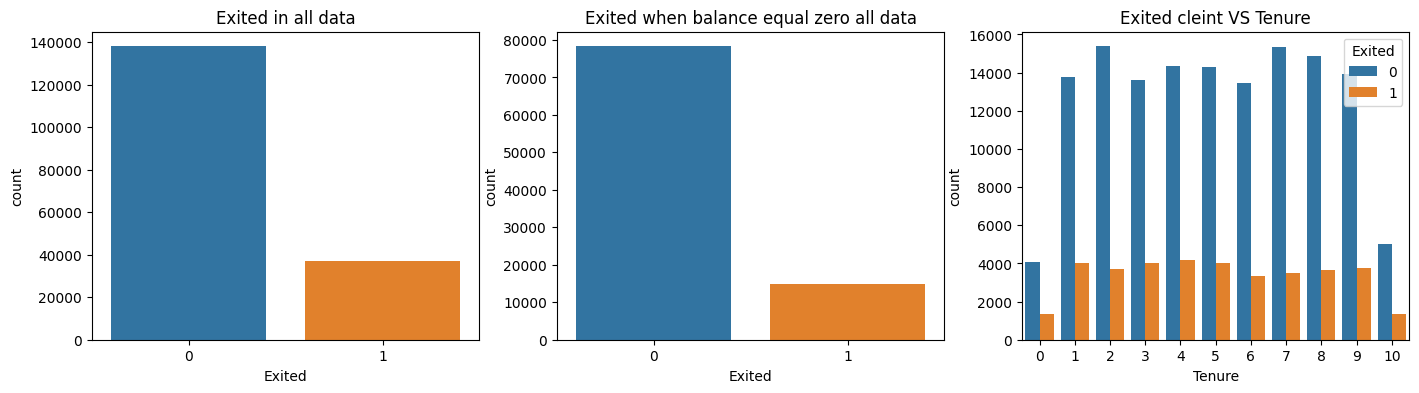

In [12]:
# Plot the data using countplot to explore the relationship between the exited colunm and the other columns
fig, axs = plt.subplots(ncols=3, figsize=(17,4))

sns.countplot(data=df_train,x="Exited", ax=axs[0])
axs[0].set_title('Exited in all data')

sns.countplot(data=df_train[df_train["Balance"]==0],x="Exited", ax=axs[1])
axs[1].set_title('Exited when balance equal zero all data')

sns.countplot(data=df_train,x=df_train["Tenure"],hue="Exited", ax=axs[2])
axs[2].set_title('Exited cleint VS Tenure')

plt.show();

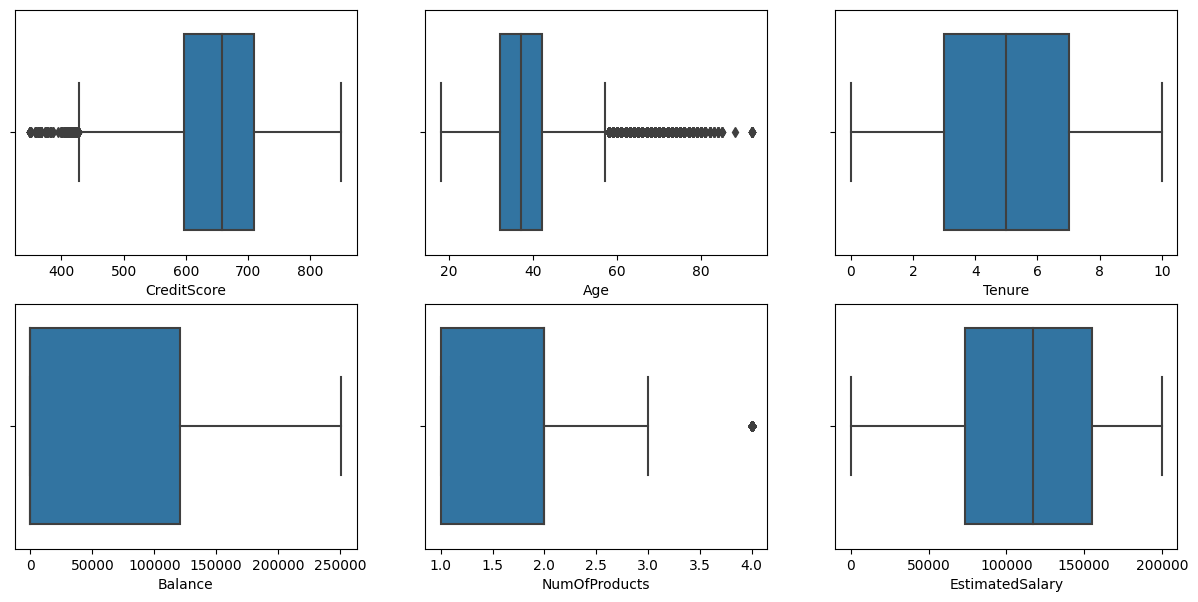

In [13]:
# Figure out the outlier using boxplot
col = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
axes = axes.flatten()

for i, column in enumerate(col):
    sns.boxplot(data=df_train,x= column,ax=axes[i])

As we can see there are an outlier in many features so we need to remove this outliers

In [14]:
# # Remove the outliers in the dataset
# outlier_data = []

# for i in ["Age", "CreditScore", "NumOfProducts"]:
#     Q1st = df_train[i].quantile(0.25)
#     Q3rd = df_train[i].quantile(0.75)
#     IQR = Q3rd - Q1st

#     low_outlier = Q1st - 1.5 * IQR
#     high_outlier = Q3rd + 1.5 * IQR

#     outlier = df_train[(df_train[i] < low_outlier) | (df_train[i] > high_outlier)]
#     outlier_data.append(outlier)

# # Loop through outlier_data and drop rows from df_train_WO
# for outlier_df in outlier_data:
#     indices_to_drop = [index for index in outlier_df.index if index in df_train.index]
#     df_train = df_train.drop(indices_to_drop, axis=0, errors='ignore')

# # Reset the index of the resulting DataFrame
# df_train.reset_index(drop=True, inplace=True)

### Features Engineering

##### Definition of Feature engineering:
is the process of selecting, transforming, or creating new features from raw data to improve the performance of machine learning models. Features are the individual measurable properties or characteristics of the phenomenon being observed, and feature engineering aims to extract the most relevant information from these features to enhance the model's predictive power.

In [15]:
def feature(df):
    df["IsBalanceZero"] = df["Balance"]==0
    df['Low_salary'] = df['EstimatedSalary'].apply(lambda x: 1 if x <= 74850 else 0)
    df['Mid_salary'] = df['EstimatedSalary'].apply(lambda x: 1 if (x <= 118528) & (x > 74850) else 0)
    df['High_salary'] = df['EstimatedSalary'].apply(lambda x: 1 if (x > 118528) else 0)
    df['Low_Balance'] = df['Balance'].apply(lambda x: 1 if (x <= 105223.25) & (x != 0) else 0)
    df['Mid_Balance'] = df['Balance'].apply(lambda x: 1 if (x <= 122314) & (x > 105223.25) else 0)
    df['High_Balance'] = df['Balance'].apply(lambda x: 1 if (x > 122314) else 0)
    df['HasCard&Active'] = df["HasCrCard"] * df["IsActiveMember"]
    df["credit_score_cat"] = pd.cut(df["CreditScore"],bins=[0, 450, 650, 750, 850],labels=["very_low", "low", "medium", "high"])

In [16]:
feature(df_train)

In [17]:
# df_train=pd.get_dummies(df_train[df_train.columns[1:]],columns=df_train.describe(include="O").columns).astype(int)
# df_train=df_train.astype(int)

In [18]:
pd.set_option('display.max_columns', None)
df_train.tail()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsBalanceZero,Low_salary,Mid_salary,High_salary,Low_Balance,Mid_Balance,High_Balance,HasCard&Active,credit_score_cat
165029,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0,True,0,0,1,0,0,0,1.0,medium
165030,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0,True,0,0,1,0,0,0,0.0,high
165031,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0,True,0,0,1,0,0,0,1.0,low
165032,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0,False,1,0,0,0,0,1,0.0,low
165033,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1,True,1,0,0,0,0,0,0.0,high


### Features Selection

In [19]:
# # use the correlation function to explore the relationship between excited column the rest of columns
# mask = np.triu(np.ones_like(df_train.corr()))
# plt.figure(figsize=(20,12))
# sns.heatmap(df_train.corr(), cmap="coolwarm", annot=True, mask=mask,vmin=-1,vmax=1,fmt=".1%");

In [20]:
# # Using another option to see the column importance
# x_ex1=df_train.drop(["Exited"],axis=1)
# y_ex1=df_train["Exited"]

# # Train a Gradient Boosting model
# model = xgb.XGBClassifier()
# model.fit(x_ex1, y_ex1)

# # Get feature importance scores
# importance_scores = model.feature_importances_

# # Sort features based on importance scores
# sorted_features = sorted(zip(importance_scores, x_ex1.columns), reverse=True)

# # Select top features based on importance scores
# k = 7
# selected_features_ec1 = [feature for _, feature in sorted_features[:k]]
# selected_features_ec1

In [21]:
# # Select the features
# F_Select1=df_train.corr()["Exited"][(df_train.corr()["Exited"]>.019) & (df_train.corr()["Exited"]<1)]
# F_Select2=df_train.corr()["Exited"][df_train.corr()["Exited"]<=-.02]
# F_Selected = pd.concat([F_Select1,F_Select2]).index

# F_Selected

# as we see above we choose the columns that have a high importance with exited column (targeted column)

In [22]:
# # use seaborn to visualize the importance of the features 
# sns.barplot(x=[_ for _, feature in sorted_features[:k]],y=[feature for _, feature in sorted_features[:k]])

We will try the 2 options of feature selection and use the better one

<a id='ML2'></a>
# ML - Model Selection


In [23]:
# creat x and y
# x=df_train[F_Selected]#.values
x=df_train.drop(["Exited"],axis=1)#.values
y=df_train["Exited"]#.values

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [26]:
categorical_features = df_train.select_dtypes(include=["object", "category"]).columns.to_list()
df_train[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 175030 entries, 0 to 165033
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Surname           175030 non-null  object  
 1   Geography         175030 non-null  object  
 2   Gender            175030 non-null  object  
 3   credit_score_cat  175030 non-null  category
dtypes: category(1), object(3)
memory usage: 5.5+ MB


In [27]:
# Use CatBoostClassifier to predict the values

CBC=CatBoostClassifier(iterations=1400,learning_rate=.07,cat_features=categorical_features,verbose=False)

CBC.fit(X_train,y_train)

y3_test_pred_CBC=CBC.predict_proba(X_test)[:,1]

print("AUC Score",roc_auc_score(y_test,y3_test_pred_CBC))

AUC Score 0.895320132688757


<a id='ML6'></a>

## Model Selected

In [28]:
# Implement the above for the test data
feature(df_test)
test_data=df_test
test_data= df_test.drop(["id","CustomerId"],axis=1)
# test_data=pd.get_dummies(df_test,columns=df_test.describe(include="O").columns).astype(int)
# test_data = test_data[F_Selected].values

In [29]:
# test_data = scaler.transform(test_data)
prob = CBC.predict_proba(test_data)[:,1]
prob

array([0.01733496, 0.7773896 , 0.01523863, ..., 0.01400997, 0.17698776,
       0.1748504 ])

In [30]:
pred=pd.DataFrame({'id':df_test["id"],'Exited':prob})
pred.head()

,id,Exited
0,165034,0.017335
1,165035,0.777390
2,165036,0.015239
3,165037,0.207912
4,165038,0.352758


In [31]:
pred.to_csv("submission.csv",index=False)

In [32]:
!head submission.csv

id,Exited
165034,0.0173349634285001
165035,0.7773895957103385
165036,0.015238634267168259
165037,0.20791206102478754
165038,0.3527576087247773
165039,0.10991236518055751
165040,0.020730304474830586
165041,0.10662548492086277
165042,0.6044179119949168
